In [302]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path

car_prices = Path("/Users/artemzalivchiy/Desktop/car_prices 2.csv")
prices = pd.read_csv(car_prices)
prices.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [303]:
prices[["make", "model", "body"]].head()

,make,model,body
0,Kia,Sorento,SUV
1,Kia,Sorento,SUV
2,BMW,3 Series,Sedan
3,Volvo,S60,Sedan
4,BMW,6 Series Gran Coupe,Sedan


In [304]:
popular_models = prices.loc[:, ["model"]]
popular_models

,model
0,Sorento
1,Sorento
2,3 Series
3,S60
4,6 Series Gran Coupe
...,...
558832,K900
558833,2500
558834,X5
558835,Altima


In [305]:
most_popular_make = []
most_popular_model = []
most_popular_make_count = []
most_popular_model_count = []

# Iterate over unique years
for year in prices['year'].unique():
    # Filter data for the current year
    year_data = prices[prices['year'] == year]
    
    # Calculate counts for each make and model for the current year
    make_counts = year_data['make'].value_counts()
    model_counts = year_data['model'].value_counts()
    
    # Get the most popular make and model for the current year
    most_popular_make.append(make_counts.idxmax() if not make_counts.empty else None)
    most_popular_model.append(model_counts.idxmax() if not model_counts.empty else None)
    
    # Get the count of the most popular make and model for the current year
    most_popular_make_count.append(make_counts.max() if not make_counts.empty else 0)
    most_popular_model_count.append(model_counts.max() if not model_counts.empty else 0)

# Create DataFrame with most popular make, model, and count for each year
most_popular = pd.DataFrame({
    'year': prices['year'].unique(), 
    'make': most_popular_make, 
    'model': most_popular_model, 
    'make count': most_popular_make_count,
    'model count': most_popular_model_count
})

# Sort the DataFrame by the 'year' column in ascending order
most_popular.sort_values(by='year', inplace=True)

print(most_popular)

    year       make     model  make count  model count
32  1982       None      None           0            0
33  1983       None      None           0            0
31  1984  chevrolet  corvette           1            1
29  1985  chevrolet  corvette           2            2
28  1986   mercedes    420sel           1            1
21  1987   mercedes      300e           1            1
30  1988       None      None           0            0
25  1989     toyota      300e           2            2
27  1990      Honda    Accord          10           10
26  1991     Toyota     Camry          15           10
24  1992     Toyota    Accord          31           22
23  1993     Toyota     Camry          48           30
22  1994      Honda    Accord          68           59
18  1995     Toyota     Camry         117           51
19  1996     Toyota    Accord         133           56
20  1997       Ford    Accord         223           92
17  1998      Honda    Accord         283          172
16  1999  

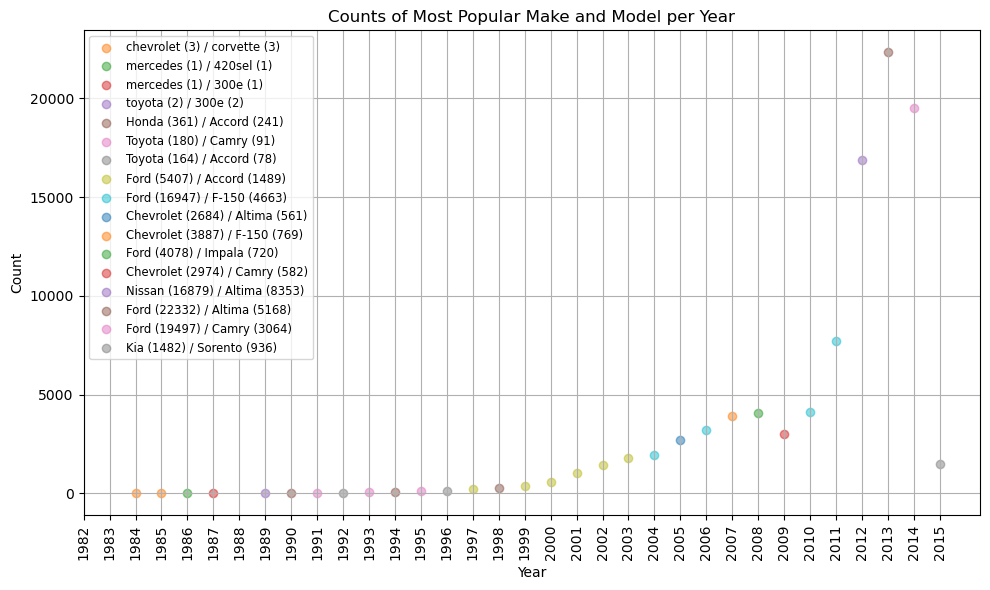

In [310]:
plt.figure(figsize=(10, 6))

# Get unique combinations of make and model
unique_combinations = most_popular[['make', 'model']].drop_duplicates().reset_index(drop=True)

# Assign a unique color for each combination
colors = plt.cm.tab10.colors[:len(unique_combinations)]

# Create scatter plot with different colors for each combination
for index, row in unique_combinations.iterrows():
    combination_data = most_popular[(most_popular['make'] == row['make']) & (most_popular['model'] == row['model'])]
    if not combination_data.empty:
        plt.scatter(combination_data['year'], combination_data['make count'], color=colors[index % len(colors)], alpha=0.5,
                    label=f"{row['make']} ({combination_data['make count'].sum()}) / {row['model']} ({combination_data['model count'].sum()})")

# Set ticks for every year on the x-axis and rotate them by 90 degrees
plt.xticks(most_popular['year'], rotation=90)

# Add legend to the top left corner
plt.legend(loc='upper left', fontsize='small')

plt.title('Counts of Most Popular Make and Model per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
transmission_counts= prices['transmission'].value_counts()
print(transmission_counts)

In [ ]:
transmission = prices.loc[:, ['transmission']]
transmission.head(10)

In [ ]:
prices.count()

In [ ]:
color_distribution_no = prices.dropna(how='any')
color_distribution_no

In [ ]:
#Question 5 
color_distribution = prices['color'].value_counts()
color_distribution

In [ ]:

valid_colors = prices['color'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c.isdigit() for c in x) and not any(c == '—' for c in x))

# Get value counts of valid colors
color_distribution = prices[valid_colors]['color'].value_counts()

# Display the result
print(color_distribution)

In [ ]:
valid_colors = color_distribution[~color_distribution.index.str.contains("—")]

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(valid_colors, startangle=140)
plt.title('Color Distribution Exterior')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(valid_colors.index, valid_colors.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#Question 5 but for interior 
color_distribution = prices['interior'].value_counts()
color_distribution

In [ ]:
valid_interior = prices['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))

# Get value counts of valid interior colors
interior_distribution = prices[valid_interior]['interior'].value_counts()

# Display the result
print(interior_distribution)

In [ ]:
# Filter out valid interior colors
valid_interior = prices['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))
interior_distribution = prices[valid_interior]['interior'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(interior_distribution, startangle=140)
plt.title('Color Distribution Interior')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(interior_distribution.index, interior_distribution.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#Question 8 
prices['Profit'] = prices['sellingprice']- prices['mmr']
profit_by_make = prices.groupby('make')["Profit"].sum()
prices['Profit']

In [ ]:
#Question 9
median_price = prices.groupby('make')['sellingprice'].median()
median_price

In [ ]:
# Filter out rows with state codes of length 2
prices_filtered = prices[prices['state'].str.len() == 2]

# Group by 'state' to get the count of dealerships per state
dealership_count_per_state = prices_filtered.groupby('state').size().reset_index(name='total_dealerships')

# Drop specified columns from the DataFrame
columns_to_drop = ['year', 'model', 'make', 'trim', 'body', 'transmission', 'vin', 'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice', 'saledate', 'Profit']
prices = prices.drop(
    labels=columns_to_drop,
    axis=1,
    inplace=False
)

# Display the count of dealerships per state and the modified DataFrame
display(dealership_count_per_state)

In [ ]:
prices_filtered = prices[prices['state'].str.len() == 2]

# Group by 'state' to get the count of dealerships per state
dealership_count_per_state = prices_filtered.groupby('state').size().reset_index(name='total_dealerships')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(dealership_count_per_state['state'], dealership_count_per_state['total_dealerships'])
plt.xlabel('State')
plt.ylabel('Total Dealerships')
plt.title('Total Dealerships per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Question 